## BeautifulSoup 을 사용한 웹 크롤링
- 웹 크롤링: 웹에 있는 정보 중에서 필요한 데이터를 긁어온다.

In [1]:
from bs4 import BeautifulSoup

In [2]:
page = open('../data/03. test_first.html', 'r').read() # r = read
soup = BeautifulSoup(page, 'html.parser') 
# `html.parser` - parser 종류 중 하나
# lxml, xml, html5lib
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Simple HTML Title
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    First Item
    <a href="https://www.naver.com" id="pw-link">
     Naver
    </a>
   </p>
   <p class="inner-text second-item">
    Second Item
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    This is outer-text
   </b>
  </p>
 </body>
</html>


In [3]:
html = list(soup.children)[2] # children <-> parent
body = list(html.children)[3]
body

<body>
<div>
<p class="inner-text first-item" id="first">
                First Item
                <a href="https://www.naver.com" id="pw-link">Naver</a>
</p>
<p class="inner-text second-item">
                Second Item
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                This is outer-text
            </b>
</p>
</body>

In [4]:
soup.body

<body>
<div>
<p class="inner-text first-item" id="first">
                First Item
                <a href="https://www.naver.com" id="pw-link">Naver</a>
</p>
<p class="inner-text second-item">
                Second Item
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                This is outer-text
            </b>
</p>
</body>

In [5]:
soup.find_all('p') # 여러개를 list로
# soup.find('p') # 첫번째 p만 가져오기

[<p class="inner-text first-item" id="first">
                 First Item
                 <a href="https://www.naver.com" id="pw-link">Naver</a>
 </p>, <p class="inner-text second-item">
                 Second Item
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>, <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 This is outer-text
             </b>
 </p>]

In [6]:
soup.find_all('p', class_='inner-text') # 태그와 클래스로 찾기

[<p class="inner-text first-item" id="first">
                 First Item
                 <a href="https://www.naver.com" id="pw-link">Naver</a>
 </p>, <p class="inner-text second-item">
                 Second Item
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>]

In [7]:
soup.find_all(id='first') # id로 찾기

[<p class="inner-text first-item" id="first">
                 First Item
                 <a href="https://www.naver.com" id="pw-link">Naver</a>
 </p>]

In [8]:
# soup.head
soup.head.next_sibling.next_sibling

<body>
<div>
<p class="inner-text first-item" id="first">
                First Item
                <a href="https://www.naver.com" id="pw-link">Naver</a>
</p>
<p class="inner-text second-item">
                Second Item
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                This is outer-text
            </b>
</p>
</body>

In [9]:
soup.body.previous_sibling.previous_sibling

<head>
<title>Simple HTML Title</title>
</head>

In [10]:
print(body.p)
print(body.p.next_sibling.next_sibling)
list(body.p.next_siblings)

<p class="inner-text first-item" id="first">
                First Item
                <a href="https://www.naver.com" id="pw-link">Naver</a>
</p>
<p class="inner-text second-item">
                Second Item
                <a href="https://www.python.org" id="py-link">Python</a>
</p>


['\n', <p class="inner-text second-item">
                 Second Item
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>, '\n']

In [11]:
for each_tag in soup.find_all('p'):
    print(each_tag.get_text())


                First Item
                Naver


                Second Item
                Python



                Data Science is funny.
            



                This is outer-text
            



In [12]:
body.get_text()

'\n\n\n                First Item\n                Naver\n\n\n                Second Item\n                Python\n\n\n\n\n                Data Science is funny.\n            \n\n\n\n                This is outer-text\n            \n\n'

In [13]:
links = soup.find_all('a')
for link in links:
    href = link['href']
    text = link.string
    print(text + '-->' + href)

Naver-->https://www.naver.com
Python-->https://www.python.org


In [14]:
soup.find_all(['a', 'b'])

[<a href="https://www.naver.com" id="pw-link">Naver</a>,
 <a href="https://www.python.org" id="py-link">Python</a>,
 <b>
                 Data Science is funny.
             </b>,
 <b>
                 This is outer-text
             </b>]

In [15]:
soup.find_all('p', 'inner-text')

[<p class="inner-text first-item" id="first">
                 First Item
                 <a href="https://www.naver.com" id="pw-link">Naver</a>
 </p>, <p class="inner-text second-item">
                 Second Item
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>]

## 네이버 영화 평점 분석
- `네이버 영화 > 영화랭킹 > 평점순(현재상영영화)` 데이터 사용
- 날짜 변화에 따른 영화별 평점 변화 분석

### 개발자 도구로 html 코드 확인하기
- 크롬 기준 `우측 상단 설정 버튼 > 도구 더보기 > 개발자 도구` or `ctrl+shift+i`

In [16]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen

url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20200115"
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20200115" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <meta

In [17]:
## 제목 가져오기
soup.find_all('div', 'tit5')[0].a.string

'포드 V 페라리'

In [18]:
## 포인트 가져오기
soup.find_all('td', 'point')[0].string

'9.54'

In [19]:
# 날짜 array를 만들기
# date_range(언제부터, periods=몇 개, freq=주기)
date = pd.date_range('2019-10-8', periods=100, freq='d') # d, m, y
date

DatetimeIndex(['2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11',
               '2019-10-12', '2019-10-13', '2019-10-14', '2019-10-15',
               '2019-10-16', '2019-10-17', '2019-10-18', '2019-10-19',
               '2019-10-20', '2019-10-21', '2019-10-22', '2019-10-23',
               '2019-10-24', '2019-10-25', '2019-10-26', '2019-10-27',
               '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31',
               '2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04',
               '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08',
               '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-16',
               '2019-11-17', '2019-11-18', '2019-11-19', '2019-11-20',
               '2019-11-21', '2019-11-22', '2019-11-23', '2019-11-24',
               '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28',
               '2019-11-29', '2019-11-30', '2019-12-01', '2019-12-02',
      

In [20]:
import urllib
# tqdm - 진행 상황 progress bar 표시
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

# list - append : 한개, extend : list를 추가 가능
# movie_date.append('2019-02-44')
# movie_date.extend(['2019-02-21', '2048-29-21', ...])

for today in tqdm_notebook(date):
    url1 = "https://movie.naver.com/"
    url2 = "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    url = url1+url2
    
    html = url.format(date=urllib.parse.quote(today.strftime('%Y%m%d')) ) #주소
    response = urlopen(html)
    
    soup = BeautifulSoup(response, 'html.parser')
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend( [ today for n in range(end) ] )
    movie_name.extend( [ soup.find_all('div', 'tit5')[n].a.string 
                        for n in range(end) ] )
    movie_point.extend( [ soup.find_all('td', 'point')[n].string 
                        for n in range(end)])
    
print(movie_date)
print(movie_name)
print(movie_point)
#     strftime = 날짜, 시간을 string으로 변환 (pandas)
#     ex) print(today.strftime('%Y%m%d'))

#     urllib.parse.quote - 파이썬에서 url을 조작할 때 사용
#     - 특수문자 포함된 string을 퍼센트 인코딩
#     - print( urllib.parse.quote('블로그') )



[Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00', freq='D'), Timestamp('2019-10-08 00:00:00

['주전장', '사랑의 선물', '안녕 베일리', '알라딘', '폴란드로 간 아이들', '교회오빠', '타샤 튜더', '벌새', '마담 프루스트의 비밀정원', '조커', '나는 내일, 어제의 너와 만난다', '우리집', '기생충', '양자물리학', '장사리 : 잊혀진 영웅들', '엑시트', '가장 보통의 연애', '퍼펙트맨', '더 룸', '에곤 쉴레: 욕망이 그린 그림', '원스 어폰 어 타임... 인 할리우드', '힘을 내요, 미스터 리', '극장판 헬로카봇 : 달나라를 구해줘!', '47미터 2', '애드 아스트라', '레플리카', '미드소마', '나쁜 녀석들: 더 무비', '예스터데이', '그것: 두 번째 이야기', '유열의 음악앨범', '타짜: 원 아이드 잭', '주전장', '사랑의 선물', '안녕 베일리', '아이언 자이언트', '폴란드로 간 아이들', '교회오빠', '타샤 튜더', '벌새', '마담 프루스트의 비밀정원', '나는 내일, 어제의 너와 만난다', '조커', '우리집', '기생충', '양자물리학', '장사리 : 잊혀진 영웅들', '엑시트', '가장 보통의 연애', '퍼펙트맨', '더 룸', '에곤 쉴레: 욕망이 그린 그림', '원스 어폰 어 타임... 인 할리우드', '힘을 내요, 미스터 리', '극장판 헬로카봇 : 달나라를 구해줘!', '47미터 2', '애드 아스트라', '레플리카', '미드소마', '나쁜 녀석들: 더 무비', '예스터데이', '그것: 두 번째 이야기', '유열의 음악앨범', '타짜: 원 아이드 잭', '주전장', '사랑의 선물', '안녕 베일리', '아이언 자이언트', '폴란드로 간 아이들', '교회오빠', '레드슈즈', '벌새', '나는 내일, 어제의 너와 만난다', '조커', '우리집', '기생충', '양자물리학', '장사리 : 잊혀진 영웅들', '엑시트', '가장 보통의 연애', '퍼펙트맨', '죽거나 혹은 나쁘거나', '더 룸', '에곤 쉴레: 욕망이 그린 그림', '원스 어폰 어 타임... 인 할리우드', 


['9.53', '9.47', '9.43', '9.38', '9.32', '9.28', '9.04', '8.96', '8.92', '8.86', '8.83', '8.80', '8.48', '8.45', '8.39', '8.30', '8.20', '8.09', '7.97', '7.92', '7.62', '7.57', '7.49', '7.28', '7.25', '6.87', '6.65', '6.58', '6.58', '6.23', '6.07', '5.46', '9.53', '9.46', '9.42', '9.33', '9.32', '9.29', '9.04', '8.95', '8.92', '8.83', '8.83', '8.79', '8.48', '8.45', '8.39', '8.30', '8.16', '8.09', '7.98', '7.92', '7.62', '7.57', '7.48', '7.28', '7.25', '6.87', '6.65', '6.58', '6.57', '6.23', '6.07', '5.43', '9.53', '9.45', '9.42', '9.33', '9.32', '9.29', '9.24', '8.94', '8.83', '8.82', '8.79', '8.48', '8.45', '8.39', '8.30', '8.11', '8.08', '8.08', '7.98', '7.92', '7.63', '7.57', '7.48', '7.28', '7.26', '6.85', '6.65', '6.62', '6.58', '6.56', '6.23', '6.07', '5.41', '9.51', '9.45', '9.42', '9.33', '9.32', '9.30', '9.28', '9.25', '9.24', '8.93', '8.80', '8.79', '8.78', '8.48', '8.45', '8.39', '8.30', '8.07', '8.07', '8.05', '7.98', '7.98', '7.92', '7.82', '7.69', '7.64', '7.57', '7.49'

In [21]:
movie = pd.DataFrame({'date': movie_date, 
                      'name': movie_name, 
                      'point': movie_point})
movie.head()

,date,name,point
0,2019-10-08,주전장,9.53
1,2019-10-08,사랑의 선물,9.47
2,2019-10-08,안녕 베일리,9.43
3,2019-10-08,알라딘,9.38
4,2019-10-08,폴란드로 간 아이들,9.32


In [22]:
import numpy as np
## 영화별 점수 합산 보기 - pivoting
# point를 숫자로 바꾸기
movie['point'] = pd.to_numeric(movie['point']) 

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum) #sum
movie_unique = movie_unique.sort_values(by='point', ascending=False)
movie_unique.head() 

,point
name,
교회오빠,908.57
벌새,889.89
주전장,883.59
기생충,831.49
메기,801.77


In [23]:
## 영화별 점수 평균 보기 - pivoting
movie['point'] = pd.to_numeric(movie['point']) 

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.mean) # mean
# mean이 기본이기 때문에 생략 가능
movie_unique = movie_unique.sort_values(by='point', ascending=False)
movie_unique.head()

,point
name,
그린 북,9.610000
가버나움,9.590000
포드 V 페라리,9.567381
주전장,9.500968
사랑의 선물,9.451250


In [24]:
tmp = movie.query("name == ['기생충']") # query = 필터링
tmp

,date,name,point
12,2019-10-08,기생충,8.48
44,2019-10-09,기생충,8.48
75,2019-10-10,기생충,8.48
110,2019-10-11,기생충,8.48
148,2019-10-12,기생충,8.48
...,...,...,...
4370,2020-01-11,기생충,8.49
4416,2020-01-12,기생충,8.49
4457,2020-01-13,기생충,8.49
4497,2020-01-14,기생충,8.49


In [25]:
tmp = movie.query("name == ['기생충', '겨울왕국 2']") # query = 필터링
tmp

,date,name,point
12,2019-10-08,기생충,8.48
44,2019-10-09,기생충,8.48
75,2019-10-10,기생충,8.48
110,2019-10-11,기생충,8.48
148,2019-10-12,기생충,8.48
...,...,...,...
4457,2020-01-13,기생충,8.49
4495,2020-01-14,겨울왕국 2,8.71
4497,2020-01-14,기생충,8.49
4537,2020-01-15,겨울왕국 2,8.71


In [26]:
tmp = movie.query('point > 9')
tmp

,date,name,point
0,2019-10-08,주전장,9.53
1,2019-10-08,사랑의 선물,9.47
2,2019-10-08,안녕 베일리,9.43
3,2019-10-08,알라딘,9.38
4,2019-10-08,폴란드로 간 아이들,9.32
...,...,...,...
4522,2020-01-15,눈의 여왕4,9.20
4523,2020-01-15,나이브스 아웃,9.13
4524,2020-01-15,하이큐!! 재능과 센스,9.12
4525,2020-01-15,러브레터,9.11


C:\Users\ezen\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


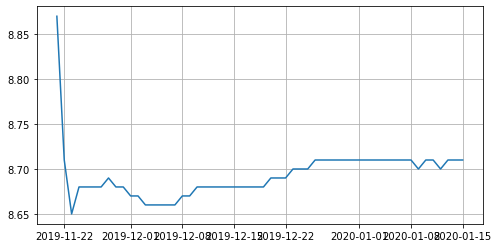

In [27]:
# 영화 평점 변화 (영화 별)
import matplotlib.pyplot as plt
%matplotlib inline

parasite = movie.query('name == "겨울왕국 2"')

plt.figure( figsize=(8, 4) )
plt.plot( parasite['date'], parasite['point'] )
plt.grid()
plt.show()

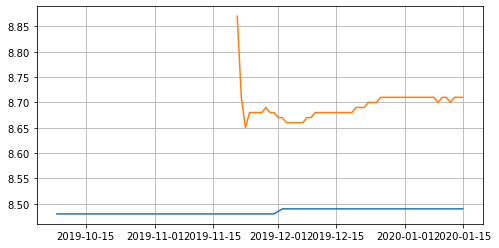

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

parasite = movie.query('name == "기생충"')
snow = movie.query('name == "겨울왕국 2"')

plt.figure( figsize=(8, 4) )
plt.plot( parasite['date'], parasite['point'], snow['date'], snow['point'] )
plt.grid()
plt.show()

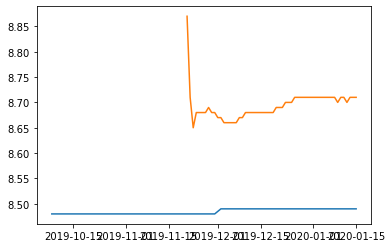

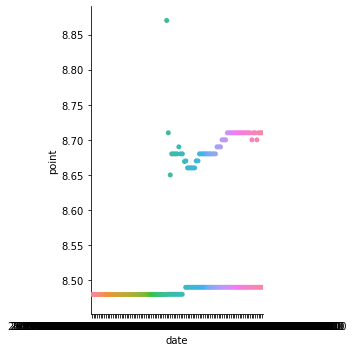

In [29]:
import seaborn as sns

parasite = movie.query('name == "기생충"')
snow = movie.query('name == "겨울왕국 2"')
plt.plot(parasite['date'], parasite['point'])
plt.plot(snow['date'], snow['point'])
plt.show()

selected = movie.query('name == ["기생충", "겨울왕국 2"]')
sns.catplot(x="date", y="point", data=selected)

In [30]:
# matplotlib 한글 지원을 위한 코드
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

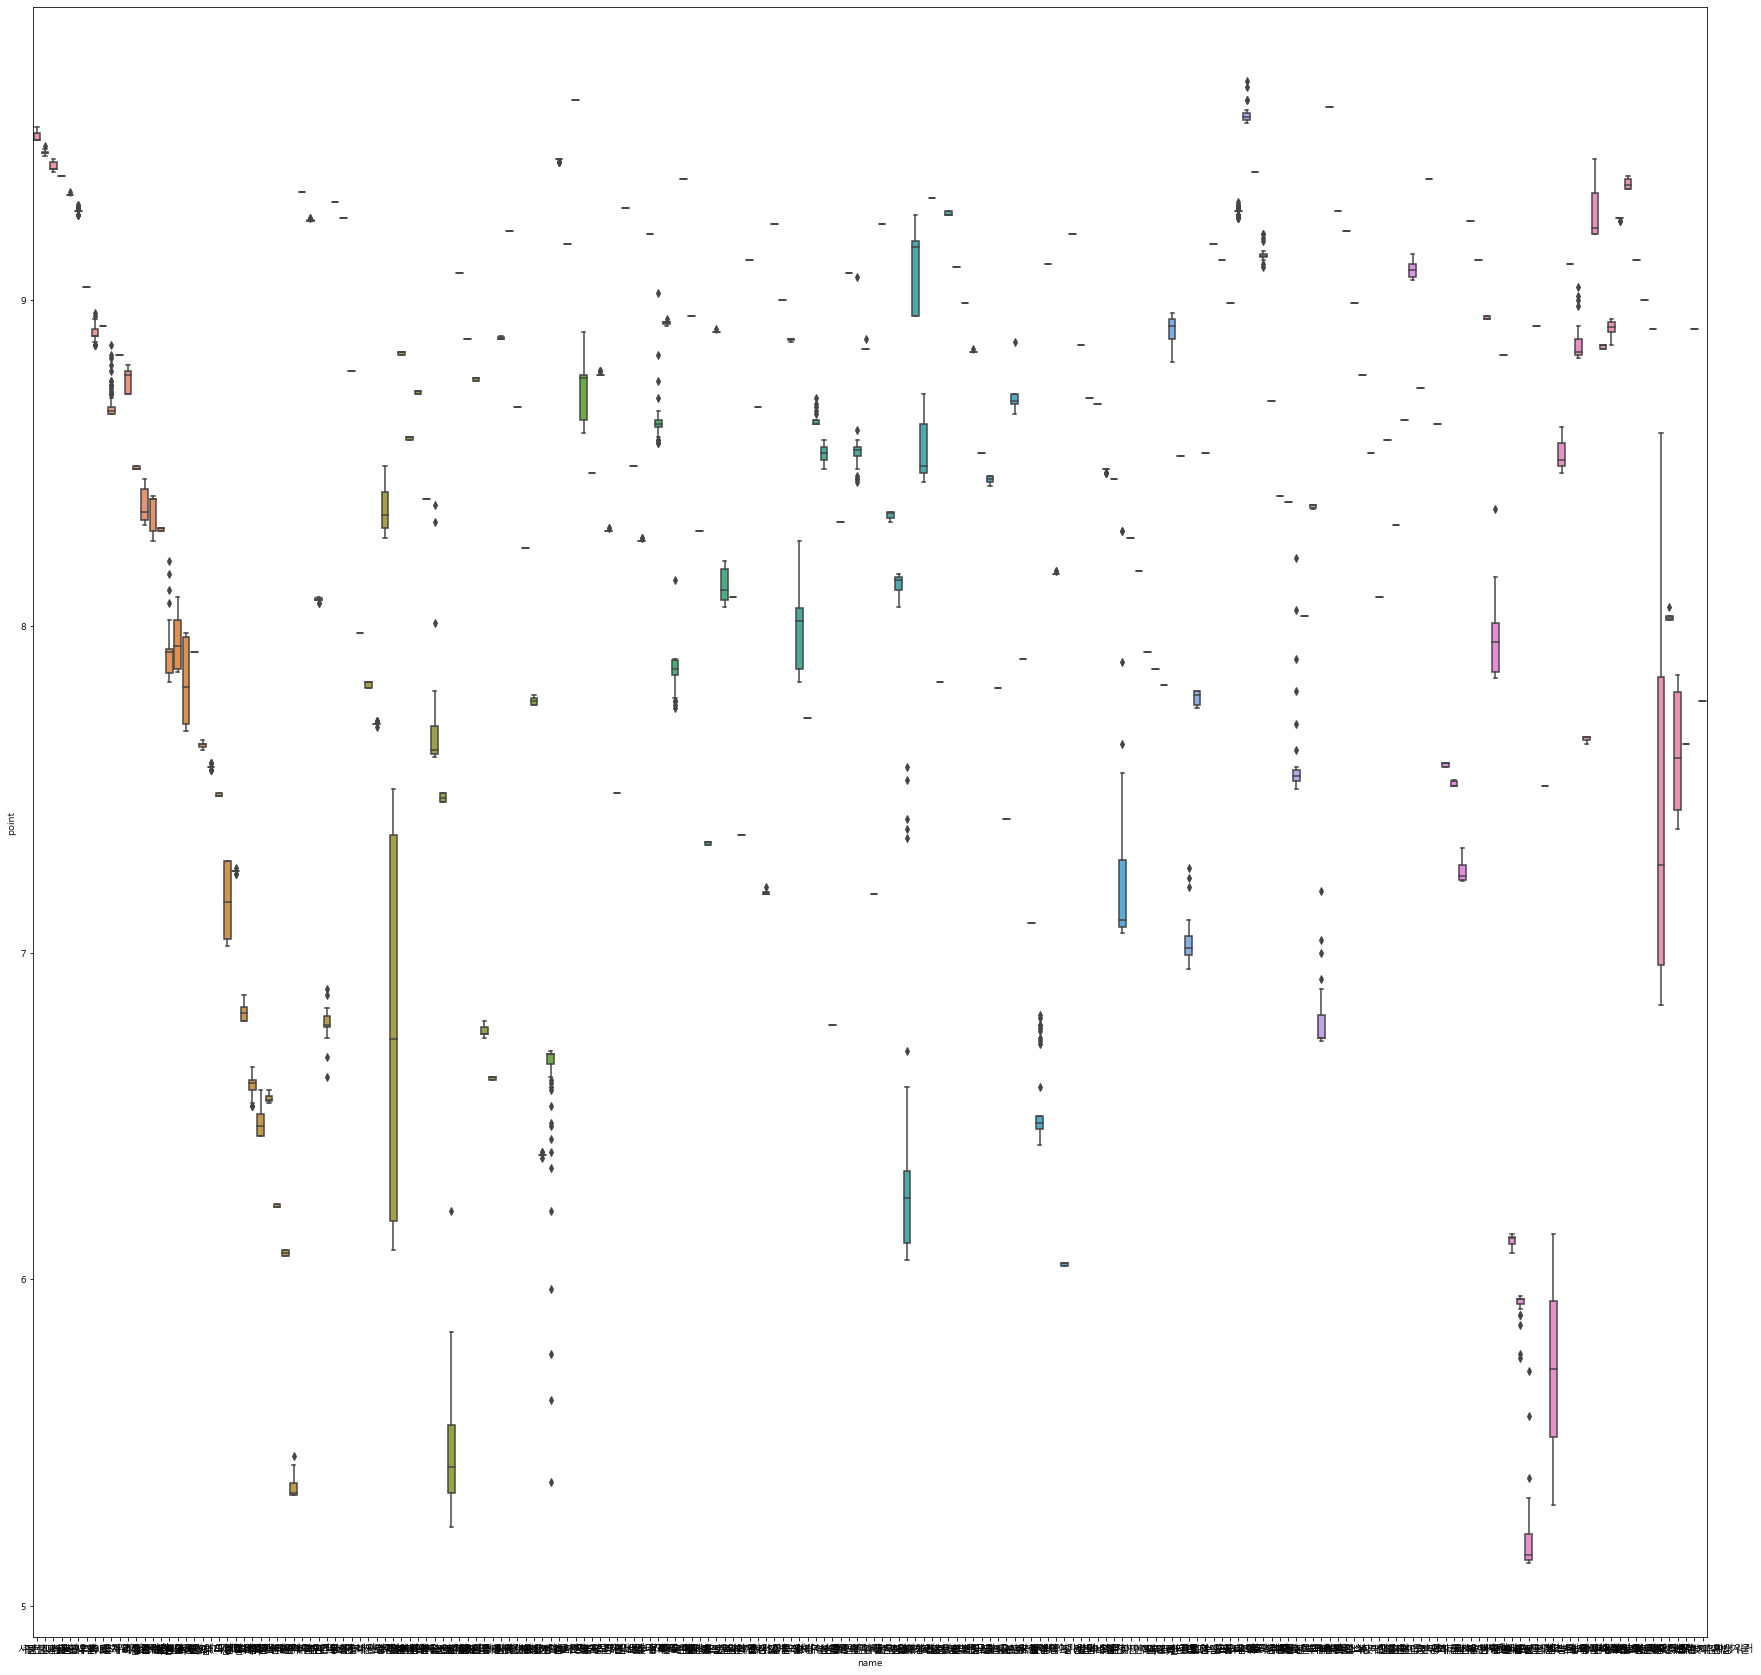

In [31]:
# selected = movie.query('name == ["기생충", "겨울왕국 2"]')
plt.figure(figsize=(30,30))
selected = movie.query('point > 5')
sns.boxplot(x="name", y="point", data=selected)
plt.show()

## 영화별 날짜 변화에 따른 평점 확인하기

In [36]:
movie_pivot = pd.pivot_table(movie,
                            index='date',
                            columns='name',
                            values=['point'])
movie_pivot.to_csv('../data/03. movie_pivot_table.csv',
                  sep=',',
                  encoding='utf-8')
movie_pivot.head()

point                                                    \
name       21 브릿지: 테러 셧다운 47미터 2 7번방의 선물 80일간의 세계일주 82년생 김지영 가버나움 가장 보통의 연애   
date                                                                          
2019-10-08            NaN   7.28     NaN        NaN      NaN  NaN      8.20   
2019-10-09            NaN   7.28     NaN        NaN      NaN  NaN      8.16   
2019-10-10            NaN   7.28     NaN        NaN      NaN  NaN      8.11   
2019-10-11            NaN   7.28     NaN        NaN      NaN  NaN      8.07   
2019-10-12            NaN   7.28     NaN        NaN      NaN  NaN      8.02   

                                ...                                     \
name       감쪽같은 그녀 겨울왕국 겨울왕국 2  ... 피아니스트의 전설 하이큐!! 끝과 시작 하이큐!! 승자와 패자   
date                            ...                                      
2019-10-08     NaN  NaN    NaN  ...       NaN         NaN          NaN   
2019-10-09     NaN  NaN    NaN  ...       NaN         NaN          NaN   
2019-10-10     NaN  NaN    NaN  ...       NaN         NaN          NaN   
2019-10-11     NaN  NaN    NaN  ...       NaN         NaN          NaN   
2019-10-12     NaN  NaN    NaN  ...       NaN         NaN          NaN   

                                                                               
name       하이큐!! 재능과 센스 항거:유관순 이야기 해치지않아 해피 엔드 행동하는 양심 김대중 헌터 킬러 힘을 내요, 미스터 리  
date                                                                           
2019-10-08          NaN        NaN   NaN   NaN         NaN   NaN         7.57  
2019-10-09          NaN        NaN   NaN   NaN         NaN   NaN         7.57  
2019-10-10          NaN        NaN   NaN   NaN         NaN   NaN         7.57  
2019-10-11          NaN        NaN   NaN   NaN         NaN   NaN         7.57  
2019-10-12          NaN        NaN   NaN   NaN         NaN   NaN         7.57  

[5 rows x 206 columns]

In [40]:
movie_pivot.columns

MultiIndex([('point', '21 브릿지: 테러 셧다운'),
            ('point',         '47미터 2'),
            ('point',        '7번방의 선물'),
            ('point',     '80일간의 세계일주'),
            ('point',       '82년생 김지영'),
            ('point',           '가버나움'),
            ('point',      '가장 보통의 연애'),
            ('point',        '감쪽같은 그녀'),
            ('point',           '겨울왕국'),
            ('point',         '겨울왕국 2'),
            ...
            ('point',      '피아니스트의 전설'),
            ('point',    '하이큐!! 끝과 시작'),
            ('point',   '하이큐!! 승자와 패자'),
            ('point',   '하이큐!! 재능과 센스'),
            ('point',     '항거:유관순 이야기'),
            ('point',          '해치지않아'),
            ('point',          '해피 엔드'),
            ('point',    '행동하는 양심 김대중'),
            ('point',          '헌터 킬러'),
            ('point',   '힘을 내요, 미스터 리')],
           names=[None, 'name'], length=206)

In [42]:
movie_pivot.columns = movie_pivot.columns.droplevel()
# droplevel 
# = 지정한 Index or Colum level이 제거된 DataFrame을 return

ValueError: Cannot remove 1 levels from an index with 1 levels: at least one level must be left.

In [43]:
movie_pivot.columns

Index(['21 브릿지: 테러 셧다운', '47미터 2', '7번방의 선물', '80일간의 세계일주', '82년생 김지영', '가버나움',
       '가장 보통의 연애', '감쪽같은 그녀', '겨울왕국', '겨울왕국 2',
       ...
       '피아니스트의 전설', '하이큐!! 끝과 시작', '하이큐!! 승자와 패자', '하이큐!! 재능과 센스',
       '항거:유관순 이야기', '해치지않아', '해피 엔드', '행동하는 양심 김대중', '헌터 킬러', '힘을 내요, 미스터 리'],
      dtype='object', name='name', length=206)

In [46]:
'백두산' in movie_pivot

True

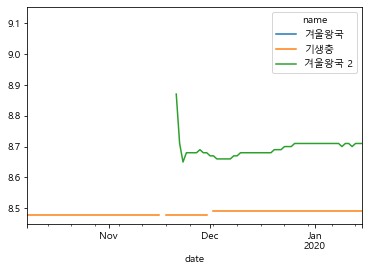

In [49]:
movie_pivot.plot(y=['겨울왕국',
                   '기생충',
                   '겨울왕국 2'])
plt.show()